In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

stop_words=set(stopwords.words("english"))

In [2]:
df=pd.read_csv("D:/Elon_musk.csv", encoding='latin-1')

In [3]:
df

Unnamed: 0                                               Text
0              1                             @kunalb11 Im an alien
1              2  @ID_AA_Carmack Ray tracing on Cyberpunk with H...
2              3                @joerogan @Spotify Great interview!
3              4                    @gtera27 Doge is underestimated
4              5  @teslacn Congratulations Tesla China for amazi...
...          ...                                                ...
1994        1995  @flcnhvy True, it sounds so surreal, but the n...
1995        1996  @PPathole Make sure to read ur terms &amp; con...
1996        1997                @TeslaGong @PPathole Samwise Gamgee
1997        1998  @PPathole Altho Dumb and Dumber is <U+0001F525...
1998        1999                          Progress update August 28

[1999 rows x 2 columns]

# EDA--->Exploratory Data Analysis.....And Cleanig A Data..

In [4]:
df.drop(columns=["Unnamed: 0"],axis=1,inplace=True)

In [5]:

df

Text
0                                @kunalb11 Im an alien
1     @ID_AA_Carmack Ray tracing on Cyberpunk with H...
2                   @joerogan @Spotify Great interview!
3                       @gtera27 Doge is underestimated
4     @teslacn Congratulations Tesla China for amazi...
...                                                 ...
1994  @flcnhvy True, it sounds so surreal, but the n...
1995  @PPathole Make sure to read ur terms &amp; con...
1996                @TeslaGong @PPathole Samwise Gamgee
1997  @PPathole Altho Dumb and Dumber is <U+0001F525...
1998                          Progress update August 28

[1999 rows x 1 columns]

In [6]:
df.isnull().sum()

Text    0
dtype: int64

In [7]:
df.duplicated().sum()

2

In [8]:
df1=df.drop_duplicates(keep='first')
df1

Text
0                                @kunalb11 Im an alien
1     @ID_AA_Carmack Ray tracing on Cyberpunk with H...
2                   @joerogan @Spotify Great interview!
3                       @gtera27 Doge is underestimated
4     @teslacn Congratulations Tesla China for amazi...
...                                                 ...
1994  @flcnhvy True, it sounds so surreal, but the n...
1995  @PPathole Make sure to read ur terms &amp; con...
1996                @TeslaGong @PPathole Samwise Gamgee
1997  @PPathole Altho Dumb and Dumber is <U+0001F525...
1998                          Progress update August 28

[1997 rows x 1 columns]

# Data Preprocessing
1.Lower Case
2.Tokenization
3.Removing Special Character
4.Removing Stop Words and Punctuation
5.Stemming

In [9]:
import nltk

In [10]:
nltk.download("punkt")

[nltk_data] Error loading punkt: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>


False

In [11]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
stop_words=set(stopwords.words("english"))

In [12]:
import string
string.punctuation
import re

In [13]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
ps.stem("Covering")

'cover'

In [14]:
def datapre(text):
    text=text.lower()
    text=re.sub('\[.*?\]', "",text)
    text=re.sub('[%s]'% re.escape(string.punctuation),'',text)
    text=re.sub('\w*\d\w*','',text)
    return text

In [15]:
df1["Text_Transform1"]=df1["Text"].apply(datapre)

In [16]:
df1

Text  \
0                                @kunalb11 Im an alien   
1     @ID_AA_Carmack Ray tracing on Cyberpunk with H...   
2                   @joerogan @Spotify Great interview!   
3                       @gtera27 Doge is underestimated   
4     @teslacn Congratulations Tesla China for amazi...   
...                                                 ...   
1994  @flcnhvy True, it sounds so surreal, but the n...   
1995  @PPathole Make sure to read ur terms &amp; con...   
1996                @TeslaGong @PPathole Samwise Gamgee   
1997  @PPathole Altho Dumb and Dumber is <U+0001F525...   
1998                          Progress update August 28   

                                        Text_Transform1  
0                                          im an alien  
1     idaacarmack ray tracing on cyberpunk with hdr ...  
2                      joerogan spotify great interview  
3                                doge is underestimated  
4     teslacn congratulations tesla china for amazin...  
...                                                 ...  
1994  flcnhvy true it sounds so surreal but the nega...  
1995  ppathole make sure to read ur terms amp condit...  
1996                  teslagong ppathole samwise gamgee  
1997                 ppathole altho dumb and dumber is   
1998                            progress update august   

[1997 rows x 2 columns]

In [17]:
def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    text=y[:]#We Cant Assign Directly into text to y we  have to do clonning here.....text=y We cant Do Here.we will clonning like this text=y[:]
    y.clear()
    
    for i in text:
        if i not in  stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    return " " .join(y)

In [18]:
df1["Text_Transform2"]=df1["Text_Transform1"].apply(transform_text)

In [19]:
df1

Text  \
0                                @kunalb11 Im an alien   
1     @ID_AA_Carmack Ray tracing on Cyberpunk with H...   
2                   @joerogan @Spotify Great interview!   
3                       @gtera27 Doge is underestimated   
4     @teslacn Congratulations Tesla China for amazi...   
...                                                 ...   
1994  @flcnhvy True, it sounds so surreal, but the n...   
1995  @PPathole Make sure to read ur terms &amp; con...   
1996                @TeslaGong @PPathole Samwise Gamgee   
1997  @PPathole Altho Dumb and Dumber is <U+0001F525...   
1998                          Progress update August 28   

                                        Text_Transform1  \
0                                          im an alien   
1     idaacarmack ray tracing on cyberpunk with hdr ...   
2                      joerogan spotify great interview   
3                                doge is underestimated   
4     teslacn congratulations tesla china for amazin...   
...                                                 ...   
1994  flcnhvy true it sounds so surreal but the nega...   
1995  ppathole make sure to read ur terms amp condit...   
1996                  teslagong ppathole samwise gamgee   
1997                 ppathole altho dumb and dumber is    
1998                            progress update august    

                                        Text_Transform2  
0                                                 alien  
1     idaacarmack ray tracing cyberpunk hdr nextleve...  
2                      joerogan spotify great interview  
3                                   doge underestimated  
4     teslacn congratulations tesla china amazing ex...  
...                                                 ...  
1994  flcnhvy true sounds surreal negative propagand...  
1995  ppathole make sure read ur terms amp condition...  
1996                  teslagong ppathole samwise gamgee  
1997                         ppathole altho dumb dumber  
1998                             progress update august  

[1997 rows x 3 columns]

In [20]:
def transform_text2(text):
    text=nltk.word_tokenize(text)
    y=[]
    for i in text:
        y.append(ps.stem(i))
        
    return " " .join(y)

In [21]:
df1["Text_Transform3"]=df1["Text_Transform2"].apply(transform_text2)

In [22]:
df1

Text  \
0                                @kunalb11 Im an alien   
1     @ID_AA_Carmack Ray tracing on Cyberpunk with H...   
2                   @joerogan @Spotify Great interview!   
3                       @gtera27 Doge is underestimated   
4     @teslacn Congratulations Tesla China for amazi...   
...                                                 ...   
1994  @flcnhvy True, it sounds so surreal, but the n...   
1995  @PPathole Make sure to read ur terms &amp; con...   
1996                @TeslaGong @PPathole Samwise Gamgee   
1997  @PPathole Altho Dumb and Dumber is <U+0001F525...   
1998                          Progress update August 28   

                                        Text_Transform1  \
0                                          im an alien   
1     idaacarmack ray tracing on cyberpunk with hdr ...   
2                      joerogan spotify great interview   
3                                doge is underestimated   
4     teslacn congratulations tesla china for amazin...   
...                                                 ...   
1994  flcnhvy true it sounds so surreal but the nega...   
1995  ppathole make sure to read ur terms amp condit...   
1996                  teslagong ppathole samwise gamgee   
1997                 ppathole altho dumb and dumber is    
1998                            progress update august    

                                        Text_Transform2  \
0                                                 alien   
1     idaacarmack ray tracing cyberpunk hdr nextleve...   
2                      joerogan spotify great interview   
3                                   doge underestimated   
4     teslacn congratulations tesla china amazing ex...   
...                                                 ...   
1994  flcnhvy true sounds surreal negative propagand...   
1995  ppathole make sure read ur terms amp condition...   
1996                  teslagong ppathole samwise gamgee   
1997                         ppathole altho dumb dumber   
1998                             progress update august   

                                        Text_Transform3  
0                                                 alien  
1     idaacarmack ray trace cyberpunk hdr nextlevel tri  
2                      joerogan spotifi great interview  
3                                       doge underestim  
4     teslacn congratul tesla china amaz execut last...  
...                                                 ...  
1994  flcnhvi true sound surreal neg propaganda stil...  
1995  ppathol make sure read ur term amp condit clic...  
1996                     teslagong ppathol samwis gamge  
1997                          ppathol altho dumb dumber  
1998                              progress updat august  

[1997 rows x 4 columns]

In [23]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.


In [24]:
from textblob import TextBlob

In [25]:
def polarity(Text_Transform):
    return TextBlob(Text_Transform).sentiment.polarity

In [26]:
df1["polarity"]=df1["Text_Transform3"].apply(polarity)

In [27]:
df1

Text  \
0                                @kunalb11 Im an alien   
1     @ID_AA_Carmack Ray tracing on Cyberpunk with H...   
2                   @joerogan @Spotify Great interview!   
3                       @gtera27 Doge is underestimated   
4     @teslacn Congratulations Tesla China for amazi...   
...                                                 ...   
1994  @flcnhvy True, it sounds so surreal, but the n...   
1995  @PPathole Make sure to read ur terms &amp; con...   
1996                @TeslaGong @PPathole Samwise Gamgee   
1997  @PPathole Altho Dumb and Dumber is <U+0001F525...   
1998                          Progress update August 28   

                                        Text_Transform1  \
0                                          im an alien   
1     idaacarmack ray tracing on cyberpunk with hdr ...   
2                      joerogan spotify great interview   
3                                doge is underestimated   
4     teslacn congratulations tesla china for amazin...   
...                                                 ...   
1994  flcnhvy true it sounds so surreal but the nega...   
1995  ppathole make sure to read ur terms amp condit...   
1996                  teslagong ppathole samwise gamgee   
1997                 ppathole altho dumb and dumber is    
1998                            progress update august    

                                        Text_Transform2  \
0                                                 alien   
1     idaacarmack ray tracing cyberpunk hdr nextleve...   
2                      joerogan spotify great interview   
3                                   doge underestimated   
4     teslacn congratulations tesla china amazing ex...   
...                                                 ...   
1994  flcnhvy true sounds surreal negative propagand...   
1995  ppathole make sure read ur terms amp condition...   
1996                  teslagong ppathole samwise gamgee   
1997                         ppathole altho dumb dumber   
1998                             progress update august   

                                        Text_Transform3  polarity  
0                                                 alien -0.250000  
1     idaacarmack ray trace cyberpunk hdr nextlevel tri  0.000000  
2                      joerogan spotifi great interview  0.800000  
3                                       doge underestim  0.000000  
4     teslacn congratul tesla china amaz execut last...  0.000000  
...                                                 ...       ...  
1994  flcnhvi true sound surreal neg propaganda stil...  0.186667  
1995  ppathol make sure read ur term amp condit clic...  0.500000  
1996                     teslagong ppathol samwis gamge  0.000000  
1997                          ppathol altho dumb dumber -0.375000  
1998                              progress updat august  0.000000  

[1997 rows x 5 columns]

In [28]:
df2=df1.drop(df1.columns[[0,1,2]],axis=1)

In [29]:
df2

Text_Transform3  polarity
0                                                 alien -0.250000
1     idaacarmack ray trace cyberpunk hdr nextlevel tri  0.000000
2                      joerogan spotifi great interview  0.800000
3                                       doge underestim  0.000000
4     teslacn congratul tesla china amaz execut last...  0.000000
...                                                 ...       ...
1994  flcnhvi true sound surreal neg propaganda stil...  0.186667
1995  ppathol make sure read ur term amp condit clic...  0.500000
1996                     teslagong ppathol samwis gamge  0.000000
1997                          ppathol altho dumb dumber -0.375000
1998                              progress updat august  0.000000

[1997 rows x 2 columns]

In [30]:
def sentiment(m):
    if m<0:
        return "negative"
    elif m>0:
        return "positive"
    else:
        return "nutral"
    

In [31]:
df2["sentiment"]=df2["polarity"].apply(sentiment)

In [32]:
df2

Text_Transform3  polarity sentiment
0                                                 alien -0.250000  negative
1     idaacarmack ray trace cyberpunk hdr nextlevel tri  0.000000    nutral
2                      joerogan spotifi great interview  0.800000  positive
3                                       doge underestim  0.000000    nutral
4     teslacn congratul tesla china amaz execut last...  0.000000    nutral
...                                                 ...       ...       ...
1994  flcnhvi true sound surreal neg propaganda stil...  0.186667  positive
1995  ppathol make sure read ur term amp condit clic...  0.500000  positive
1996                     teslagong ppathol samwis gamge  0.000000    nutral
1997                          ppathol altho dumb dumber -0.375000  negative
1998                              progress updat august  0.000000    nutral

[1997 rows x 3 columns]

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='sentiment', ylabel='count'>

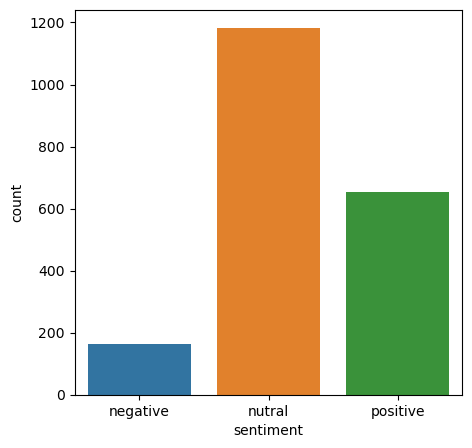

In [34]:
fig=plt.figure(figsize=(5,5))
sns.countplot(x="sentiment",data=df2)

Text(0.5, 1.0, 'Distribution Of Sentiments')

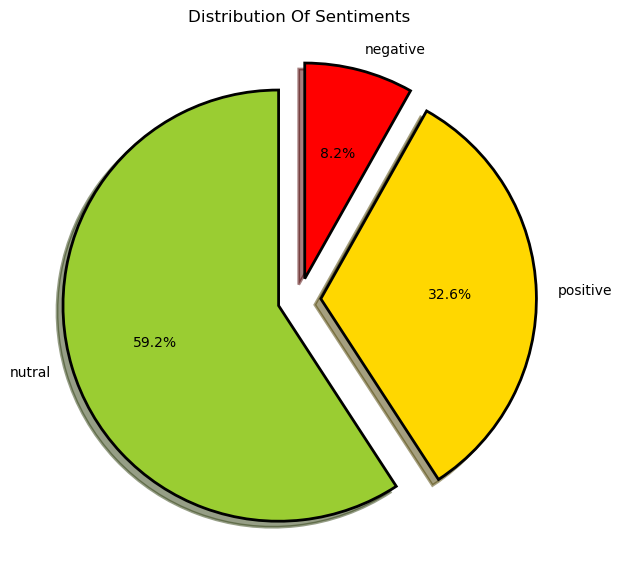

In [35]:
fig=plt.figure(figsize=(7,7))
colors=("yellowgreen","gold","red")
wp={"linewidth":2,"edgecolor":"black"}
tags=df2["sentiment"].value_counts()
explode=(0.1,0.1,0.1)
tags.plot(kind='pie',autopct='%1.1f%%',shadow=True,colors=colors,startangle=90,wedgeprops=wp,explode=explode,label='')
plt.title("Distribution Of Sentiments")

In [36]:
df2

Text_Transform3  polarity sentiment
0                                                 alien -0.250000  negative
1     idaacarmack ray trace cyberpunk hdr nextlevel tri  0.000000    nutral
2                      joerogan spotifi great interview  0.800000  positive
3                                       doge underestim  0.000000    nutral
4     teslacn congratul tesla china amaz execut last...  0.000000    nutral
...                                                 ...       ...       ...
1994  flcnhvi true sound surreal neg propaganda stil...  0.186667  positive
1995  ppathol make sure read ur term amp condit clic...  0.500000  positive
1996                     teslagong ppathol samwis gamge  0.000000    nutral
1997                          ppathol altho dumb dumber -0.375000  negative
1998                              progress updat august  0.000000    nutral

[1997 rows x 3 columns]

In [37]:
from wordcloud import WordCloud
wc=WordCloud(width=1600,height=500,min_font_size=10,background_color="black")


In [38]:
positive_tweets=wc.generate(df2[df2['sentiment']=="positive"]["Text_Transform3"].str.cat(sep=" "))
positive_tweets

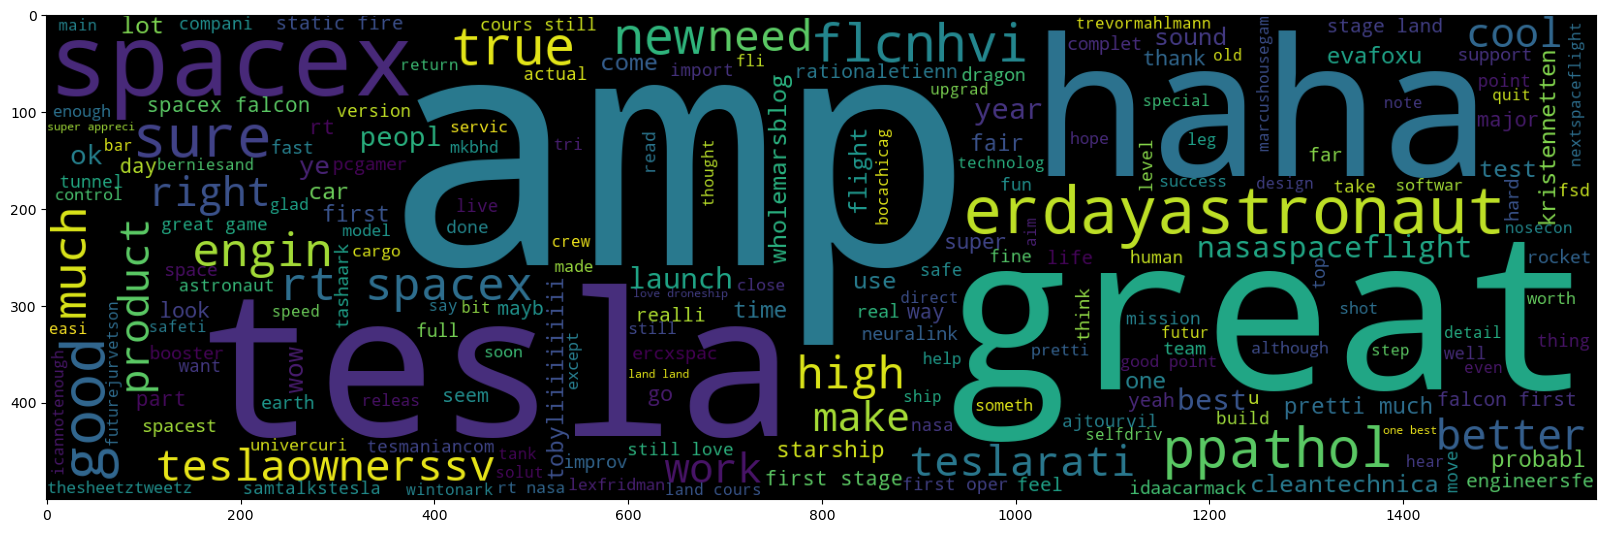

In [39]:
plt.figure(figsize=(20,15))
plt.imshow(positive_tweets)

In [40]:
negative_tweets=wc.generate(df2[df2['sentiment']=="negative"]["Text_Transform3"].str.cat(sep=" "))
negative_tweets

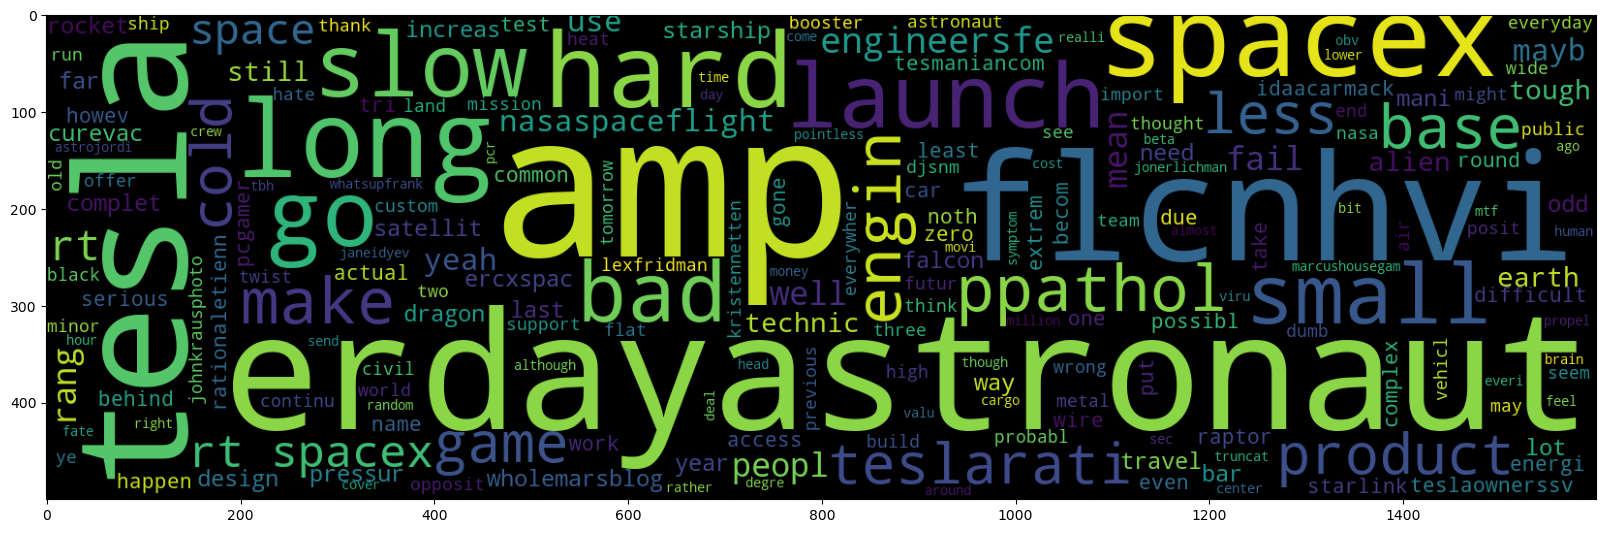

In [41]:
plt.figure(figsize=(20,15))
plt.imshow(negative_tweets)

In [42]:
neutral_tweets=wc.generate(df2[df2['sentiment']=="nutral"]["Text_Transform3"].str.cat(sep=" "))
neutral_tweets

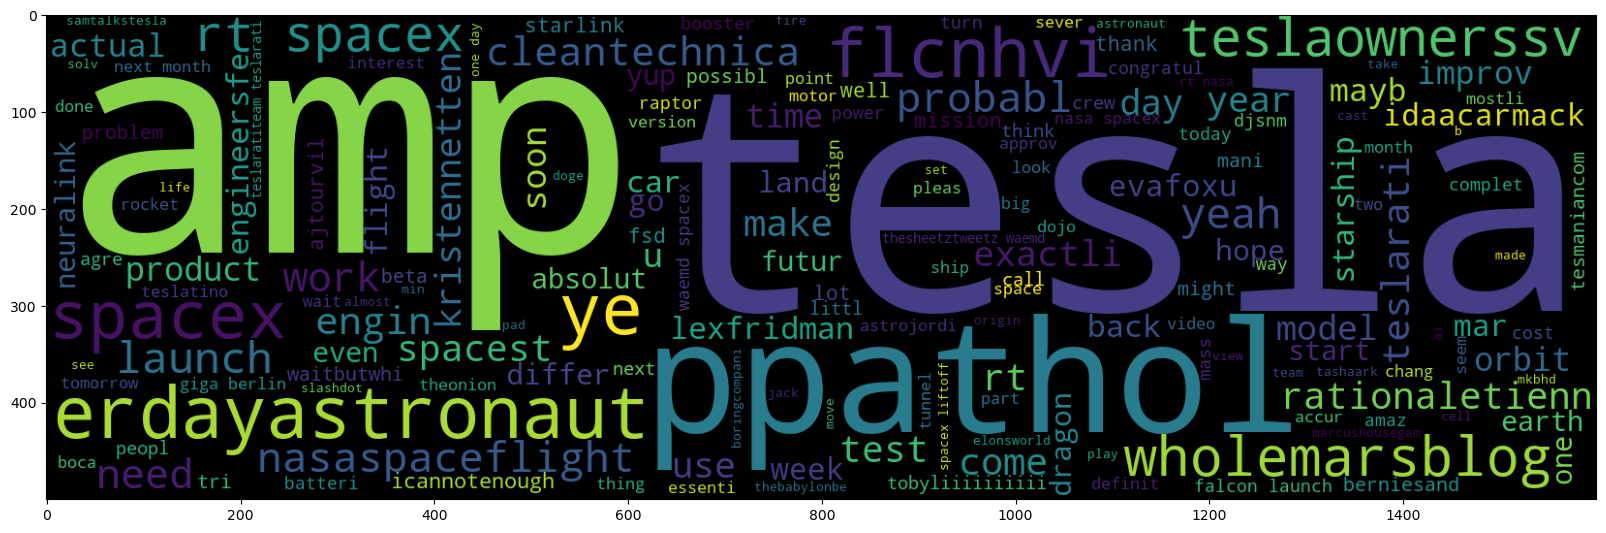

In [43]:
plt.figure(figsize=(20,15))
plt.imshow(neutral_tweets)

In [44]:
## This iS For Positive Tweets...

Po_tweets=[]
for msg in df2[df2["sentiment"]=="positive"]["Text_Transform3"].tolist():
    for word in msg.split():
        Po_tweets.append(word)

In [45]:
len(Po_tweets)

5066

In [47]:
## This iS For Negative Tweets Tweets...

Ne_tweets=[]
for msg in df2[df2["sentiment"]=="negative"]["Text_Transform3"].tolist():
    for word in msg.split():
        Ne_tweets.append(word)

In [48]:
len(Ne_tweets)

1467

In [58]:
## This iS For Neutral Tweets Tweets...

Neu_tweets=[]
for msg in df2[df2["sentiment"]=="nutral"]["Text_Transform3"].tolist():
    for word in msg.split():
        Neu_tweets.append(word)

In [59]:
len(Neu_tweets)

6506

# Model Building...

In [60]:
df2

Text_Transform3  polarity sentiment
0                                                 alien -0.250000  negative
1     idaacarmack ray trace cyberpunk hdr nextlevel tri  0.000000    nutral
2                      joerogan spotifi great interview  0.800000  positive
3                                       doge underestim  0.000000    nutral
4     teslacn congratul tesla china amaz execut last...  0.000000    nutral
...                                                 ...       ...       ...
1994  flcnhvi true sound surreal neg propaganda stil...  0.186667  positive
1995  ppathol make sure read ur term amp condit clic...  0.500000  positive
1996                     teslagong ppathol samwis gamge  0.000000    nutral
1997                          ppathol altho dumb dumber -0.375000  negative
1998                              progress updat august  0.000000    nutral

[1997 rows x 3 columns]

In [61]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df2["sentiment"]=LE.fit_transform(df2["sentiment"])

In [62]:
df2

Text_Transform3  polarity  sentiment
0                                                 alien -0.250000          0
1     idaacarmack ray trace cyberpunk hdr nextlevel tri  0.000000          1
2                      joerogan spotifi great interview  0.800000          2
3                                       doge underestim  0.000000          1
4     teslacn congratul tesla china amaz execut last...  0.000000          1
...                                                 ...       ...        ...
1994  flcnhvi true sound surreal neg propaganda stil...  0.186667          2
1995  ppathol make sure read ur term amp condit clic...  0.500000          2
1996                     teslagong ppathol samwis gamge  0.000000          1
1997                          ppathol altho dumb dumber -0.375000          0
1998                              progress updat august  0.000000          1

[1997 rows x 3 columns]

<AxesSubplot:>

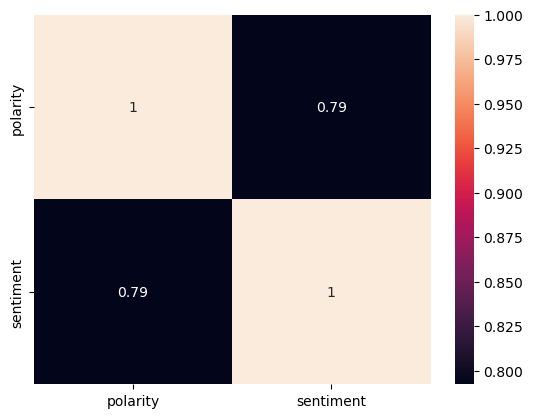

In [63]:
sns.heatmap(df2.corr(),annot=True)

In [64]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tfidf=TfidfVectorizer()

In [65]:
tfidf=TfidfVectorizer()
X=tfidf.fit_transform(df2["Text_Transform3"]).toarray() # To Convert Sparce Array To tends Array

In [66]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [67]:
X.shape

(1997, 3706)

In [68]:
Y=df2["sentiment"]

In [69]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [70]:
print("Size of X_train",(X_train.shape))
print("Size of X_test",(X_test.shape))
print("Size of Y_train",(Y_train.shape))
print("Size of Y_test",(Y_test.shape))


Size of X_train (1597, 3706)
Size of X_test (400, 3706)
Size of Y_train (1597,)
Size of Y_test (400,)


In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score
LR=LogisticRegression()
LR.fit(X_train,Y_train)

LogisticRegression()

In [72]:
Y_pred=LR.predict(X_test)
LR_Accuracy_test=accuracy_score(Y_pred,Y_test)
print("Accuracy Score of Test",LR_Accuracy_test.round(2))


Accuracy Score of Test 0.78


In [73]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [74]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression()
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=100, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [80]:
clf = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [76]:
def result(clf,X_train,Y_train,X_test,Y_test):
    clf.fit(X_train,Y_train)
    y_pred=clf.predict(X_test)
    accuracy=accuracy_score(Y_test,y_pred)
    return accuracy

In [77]:
result(etc,X_train,Y_train,X_test,Y_test)

0.925

In [78]:
accuracy_scores = []

for name,clf in clf.items():
    current_accuracy= result(clf, X_train,Y_train,X_test,Y_test)
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    accuracy_scores.append(current_accuracy)

For  SVC
Accuracy -  0.8175
For  KN
Accuracy -  0.59
For  NB
Accuracy -  0.7475
For  DT
Accuracy -  0.6925
For  LR
Accuracy -  0.7775
For  RF
Accuracy -  0.9025
For  AdaBoost
Accuracy -  0.86
For  BgC
Accuracy -  0.925
For  ETC
Accuracy -  0.925
For  GBDT
Accuracy -  0.8375
For  xgb
Accuracy -  0.89


In [81]:
performance_df=pd.DataFrame({"Algorithem" :clf.keys(),"Accuracy_Score":accuracy_scores})

In [82]:
performance_df

Algorithem  Accuracy_Score
0         SVC          0.8175
1          KN          0.5900
2          NB          0.7475
3          DT          0.6925
4          LR          0.7775
5          RF          0.9025
6    AdaBoost          0.8600
7         BgC          0.9250
8         ETC          0.9250
9        GBDT          0.8375
10        xgb          0.8900

In [83]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithem")
performance_df1

Algorithem        variable   value
0         SVC  Accuracy_Score  0.8175
1          KN  Accuracy_Score  0.5900
2          NB  Accuracy_Score  0.7475
3          DT  Accuracy_Score  0.6925
4          LR  Accuracy_Score  0.7775
5          RF  Accuracy_Score  0.9025
6    AdaBoost  Accuracy_Score  0.8600
7         BgC  Accuracy_Score  0.9250
8         ETC  Accuracy_Score  0.9250
9        GBDT  Accuracy_Score  0.8375
10        xgb  Accuracy_Score  0.8900

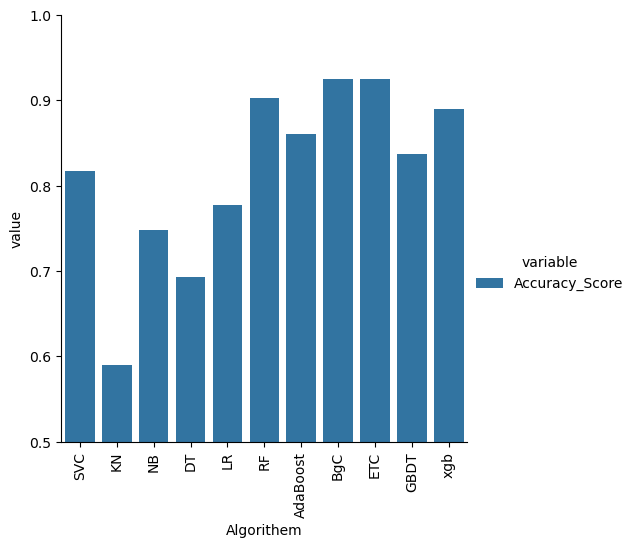

In [84]:
sns.catplot(x = 'Algorithem', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [85]:
! pip install future

In [86]:
import codecs
import re
import copy
import collections
import pandas as pd
import numpy as np
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import WordPunctTokenizer
import matplotlib
    
%matplotlib inline

In [88]:
with codecs.open("D:/positive-words.txt", "r", encoding="utf-8") as p:
    pos = p.read()
    print(pos)

;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;
; 
; Opinion Lexicon: Positive
;
; This file contains a list of POSITIVE opinion words (or sentiment words).
;
; This file and the papers can all be downloaded from 
;    http://www.cs.uic.edu/~liub/FBS/sentiment-analysis.html
;
; If you use this list, please cite one of the following two papers:
;
;   Minqing Hu and Bing Liu. "Mining and Summarizing Customer Reviews." 
;       Proceedings of the ACM SIGKDD International Conference on Knowledge 
;       Discovery and Data Mining (KDD-2004), Aug 22-25, 2004, Seattle, 
;       Washington, USA, 
;   Bing Liu, Minqing Hu and Junsheng Cheng. "Opinion Observer: Analyzing 
;       and Comparing Opinions on the Web." Proceedings of the 14th 
;       International World Wide Web conference (WWW-2005), May 10-14, 
;       2005, Chiba, Japan.
;
; Notes: 
;    1. The appearance of an opinion word in a sentence does not necessarily  
;       mean that the sentence expresse

In [89]:
with codecs.open("D:/negative-words.txt", "r", encoding="ISO-8859-1") as n:
    neg = n.read()
    print(neg)

;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;
; 
; Opinion Lexicon: Negative
;
; This file contains a list of NEGATIVE opinion words (or sentiment words).
;
; This file and the papers can all be downloaded from 
;    http://www.cs.uic.edu/~liub/FBS/sentiment-analysis.html
;
; If you use this list, please cite one of the following two papers:
;
;   Minqing Hu and Bing Liu. "Mining and Summarizing Customer Reviews." 
;       Proceedings of the ACM SIGKDD International Conference on Knowledge 
;       Discovery and Data Mining (KDD-2004), Aug 22-25, 2004, Seattle, 
;       Washington, USA, 
;   Bing Liu, Minqing Hu and Junsheng Cheng. "Opinion Observer: Analyzing 
;       and Comparing Opinions on the Web." Proceedings of the 14th 
;       International World Wide Web conference (WWW-2005), May 10-14, 
;       2005, Chiba, Japan.
;
; Notes: 
;    1. The appearance of an opinion word in a sentence does not necessarily  
;       mean that the sentence expres

In [90]:
with codecs.open("D:/stop.txt", "r", encoding="ISO-8859-1") as s:
    stop = s.read()
    print(stop)

a
a's
able
about
above
according
accordingly
across
actually
after
afterwards
again
against
ain't
all
allow
allows
almost
alone
along
already
also
although
always
am
among
amongst
an
and
another
any
anybody
anyhow
anyone
anything
anyway
anyways
anywhere
apart
appear
appreciate
appropriate
are
aren't
around
as
aside
ask
asking
associated
at
available
away
awfully
b
be
became
because
become
becomes
becoming
been
before
beforehand
behind
being
believe
below
beside
besides
best
better
between
beyond
both
brief
but
by
c
c'mon
c's
came
can
can't
cannot
cant
cause
causes
certain
certainly
changes
clearly
co
com
come
comes
concerning
consequently
consider
considering
contain
containing
contains
corresponding
could
couldn't
course
currently
d
definitely
described
despite
did
didn't
different
do
does
doesn't
doing
don't
done
down
downwards
during
e
each
edu
eg
eight
either
else
elsewhere
enough
entirely
especially
et
etc
even
ever
every
everybody
everyone
everything
everywhere
ex
exactly
example

# This is for Extracting Data from Amazon site......

In [91]:
pip install bs4

Note: you may need to restart the kernel to use updated packages.


In [92]:
pip install requests

Note: you may need to restart the kernel to use updated packages.


In [94]:
from bs4 import BeautifulSoup as bs
import pandas as pd
import requests

In [95]:
!pip install autoscraper

In [96]:
from autoscraper import AutoScraper

In [97]:
!pip install selenium 
!pip install msedge-selenium-tools selenium==3.141

In [98]:
import csv

In [99]:
from bs4 import BeautifulSoup 

In [100]:
from selenium import webdriver

In [101]:
from msedge.selenium_tools import Edge,EdgeOptions

In [102]:
pip install webdriver-manager

Note: you may need to restart the kernel to use updated packages.


In [103]:
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager

driver = webdriver.Chrome(ChromeDriverManager().install())

[WDM] - Downloading: 100%|████████████████████████████████████████████████████████| 6.79M/6.79M [02:04<00:00, 57.0kB/s]


For firefox and chrome use this one

In [104]:
def get_url(search_term):
    """Gernerate a Url from search Term"""
    template="https://www.amazon.com/s?k={}&crid=1LBHFB739NH7Z&sprefix=ultrawidemonitor%2Caps%2C327&ref=nb_sb_noss_2"
    search_term=search_term.replace(" ",'+')
    return template.format(search_term)

In [105]:
url=get_url('monitor')
print(url)

https://www.amazon.com/s?k=monitor&crid=1LBHFB739NH7Z&sprefix=ultrawidemonitor%2Caps%2C327&ref=nb_sb_noss_2


In [ ]:
driver.get(url)

# Extract The Collection

In [99]:
soup=BeautifulSoup(driver.page_source,'html.parser')

In [100]:
result=soup.find_all('div',{'data-component-type': 's-search-result'})

In [101]:
len(result)

22

# prototype the Extract The single result

In [102]:
item=result[0]

In [103]:
atag=item.h2.a

In [104]:
description=atag.text.strip()

In [105]:
url="https://www.amazon.com"+atag.get('href')

In [106]:
price_parent=item.find("span","a-price")

In [107]:
price=price_parent.find('span',"a-offscreen").text

In [108]:
rating=item.i.text

In [109]:
review_count=item.find('span',{"class":"a-size-base s-underline-text"}).text

# Generalized the Function

In [110]:
def extract_record(item):
    """ Extracr and Record the Data from single record"""
    #description and URl
    atag=item.h2.a
    description=atag.text.strip()
    url="https://www.amazon.com"+atag.get('href')
    ### Price
    price_parent=item.find("span","a-price")
    price=price_parent.find('span',"a-offscreen").text
    ##rank And Rating
    rating=item.i.text
    review_count=item.find('span',{"class":"a-size-base s-underline-text"}).text
    results=(description,price,rating,review_count,url)
    return results

In [111]:
record=[]
result=soup.find_all('div',{'data-component-type': 's-search-result'})
for item in result:
    record.append(extract_record(item))

AttributeError: 'NoneType' object has no attribute 'text'

## Error Handling

In [112]:
def extract_record(item):
    """ Extracr and Record the Data from single record"""
    #description and URl
    atag=item.h2.a
    description=atag.text.strip()
    url="https://www.amazon.com"+atag.get('href')
    ### Price
    try:
        price_parent=item.find("span","a-price")
        price=price_parent.find('span',"a-offscreen").text
    except AttributeError:
        return
    ##rank And Rating
    try:
        rating=item.i.text
        review_count=item.find('span',{"class":"a-size-base s-underline-text"}).text
    except AttributeError:
        rating=''
        review_count=''
    results=(description,price,rating,review_count,url)
    return results

In [113]:
records=[]
result=soup.find_all('div',{'data-component-type': 's-search-result'})
for item in result:
    record=extract_record(item)
    if record:
        records.append(record)

In [114]:
records[0]

('KOORUI 24 Inch Computer Monitor Full HD 1920 x 1080p VA Display 75Hz 3000:1 Contrast Ratio with HDMI, VGA, Frameless, 75 x 75 mm VESA Mountable, Ergonomic Tilt, Black',
 '$88.36',
 '4.3 out of 5 stars',
 '2,721',
 'https://www.amazon.com/gp/slredirect/picassoRedirect.html/ref=pa_sp_atf_aps_sr_pg1_1?ie=UTF8&adId=A067757634LYCXRI5QTL1&qualifier=1681734581&id=8353650967011047&widgetName=sp_atf&url=%2FKOORUI-Business-Computer-Monitor-Display%2Fdp%2FB09VD9P2Q3%2Fref%3Dsr_1_1_sspa%3Fcrid%3D1LBHFB739NH7Z%26keywords%3Dmonitor%26qid%3D1681734581%26sprefix%3Dultrawidemonitor%252Caps%252C327%26sr%3D8-1-spons%26psc%3D1')

In [115]:
for rows in records:
    print(rows[1])

$88.36
$179.99
$99.97
$89.99
$70.61
$72.99
$79.99
$346.99
$299.99
$119.99
$188.33
$224.99
$89.99
$179.99
$170.19
$329.99
$49.99
$129.83
$289.99
$460.50
$89.99
$82.99


## Getting The Next Page......Navigate the next Page 

In [116]:
def get_url(search_term):
    """Gernerate a Url from search Term"""
    template="https://www.amazon.com/s?k={}&crid=1LBHFB739NH7Z&sprefix=ultrawidemonitor%2Caps%2C327&ref=nb_sb_noss_2"
    search_term=search_term.replace(" ",'+')
    
    
    ## Add Term Querry to url
    url=template.format(search_term)
    ##Add page Querry To placeholder
    url +='&page{}'
    return url

# Putting it All Together 

In [117]:
from bs4 import BeautifulSoup 
import csv
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
def get_url(search_term):
    """Gernerate a Url from search Term"""
    template="https://www.amazon.com/s?k={}&crid=1LBHFB739NH7Z&sprefix=ultrawidemonitor%2Caps%2C327&ref=nb_sb_noss_2"
    search_term=search_term.replace(" ",'+')
    
    
    ## Add Term Querry to url
    url=template.format(search_term)
    ##Add page Querry To placeholder
    url +='&page{}'
    return url
def extract_record(item):
    """ Extracr and Record the Data from single record"""
    #description and URl
    atag=item.h2.a
    description=atag.text.strip()
    url="https://www.amazon.com"+atag.get('href')
    ### Price
    try:
        price_parent=item.find("span","a-price")
        price=price_parent.find('span',"a-offscreen").text
    except AttributeError:
        return
    ##rank And Rating
    try:
        rating=item.i.text
        review_count=item.find('span',{"class":"a-size-base s-underline-text"}).text
    except AttributeError:
        rating=''
        review_count=''
    results=(description,price,rating,review_count,url)
    return results
def main(search_term):
    """Run Main programm Routine"""
    #Startup the webdriver
    driver = webdriver.Chrome(ChromeDriverManager().install())
    record=[]
    url=get_url(search_term)
    for page in range(1,21):
        driver.get(url.format(page))
        soup=BeautifulSoup(driver.page_source,'html.parser')
        result=soup.find_all('div',{'data-component-type': 's-search-result'})
        
        for item in result:
            records=extract_record(item)
            if records:
                record.append(records)
    driver.close()
    
    ## Save Record in csv Format
    with open('results_mobile.csv','w',newline='',encoding='utf-8') as f:
        writer=csv.writer(f)
        writer.writerow(['Description','price','Rating','ReviewCount','Url'])
        writer.writerows(record)
    
                

In [118]:
main("mobile")

In [119]:
import pandas as pd

In [120]:
df=pd.read_csv("D:/results_mobile.csv")

In [121]:
df

Description      price  \
0     SAMSUNG Galaxy S23 Ultra Cell Phone, Factory U...  $1,279.99   
1     Lcasio Baby Musical Crib Mobile with Night Lig...     $34.99   
2     Woodland Baby Mobile Rustic Fox Deer Bear Moun...     $23.99   
3     Tiny Love Meadow Days Take Along Mobile, 1 Cou...     $23.99   
4     Eners Baby Crib Mobile with Music and Lights, ...     $30.99   
...                                                 ...        ...   
1155  Baby Crib Mobile Wooden Wind Chime Bed Bell,Nu...     $29.98   
1156  Achim Cordless Light Filtering Mini Blinds for...     $15.98   
1157  Baby Mobile for Crib, Portable Mobile Crib for...     $25.99   
1158  Living Textiles Baby Musical Mobile - Ava Bird...     $59.99   
1159  Boho Rainbow Nursery Mobile,Neutral Baby Crib ...     $43.99   

                  Rating ReviewCount  \
0     4.5 out of 5 stars         120   
1     4.1 out of 5 stars         282   
2     4.6 out of 5 stars       1,062   
3     4.4 out of 5 stars      10,888   
4     4.5 out of 5 stars          32   
...                  ...         ...   
1155  4.7 out of 5 stars       1,116   
1156  4.2 out of 5 stars      42,301   
1157  3.6 out of 5 stars          39   
1158  4.4 out of 5 stars         263   
1159  4.3 out of 5 stars         125   

                                                    Url  
0     https://www.amazon.com/gp/slredirect/picassoRe...  
1     https://www.amazon.com/Lcasio-Relaxing-Rotatin...  
2     https://www.amazon.com/Woodland-Mountains-Nurs...  
3     https://www.amazon.com/Tiny-Love-Meadow-Along-...  
4     https://www.amazon.com/Mobile-Lights-Control-R...  
...                                                 ...  
1155  https://www.amazon.com/Mobile-Nursery-Bedroom-...  
1156  https://www.amazon.com/Cordless-Light-Filterin...  
1157  https://www.amazon.com/gp/slredirect/picassoRe...  
1158  https://www.amazon.com/gp/slredirect/picassoRe...  
1159  https://www.amazon.com/gp/slredirect/picassoRe...  

[1160 rows x 5 columns]

In [122]:
df.drop(df.columns[[4]],axis=1,inplace=True)

In [123]:
df

Description      price  \
0     SAMSUNG Galaxy S23 Ultra Cell Phone, Factory U...  $1,279.99   
1     Lcasio Baby Musical Crib Mobile with Night Lig...     $34.99   
2     Woodland Baby Mobile Rustic Fox Deer Bear Moun...     $23.99   
3     Tiny Love Meadow Days Take Along Mobile, 1 Cou...     $23.99   
4     Eners Baby Crib Mobile with Music and Lights, ...     $30.99   
...                                                 ...        ...   
1155  Baby Crib Mobile Wooden Wind Chime Bed Bell,Nu...     $29.98   
1156  Achim Cordless Light Filtering Mini Blinds for...     $15.98   
1157  Baby Mobile for Crib, Portable Mobile Crib for...     $25.99   
1158  Living Textiles Baby Musical Mobile - Ava Bird...     $59.99   
1159  Boho Rainbow Nursery Mobile,Neutral Baby Crib ...     $43.99   

                  Rating ReviewCount  
0     4.5 out of 5 stars         120  
1     4.1 out of 5 stars         282  
2     4.6 out of 5 stars       1,062  
3     4.4 out of 5 stars      10,888  
4     4.5 out of 5 stars          32  
...                  ...         ...  
1155  4.7 out of 5 stars       1,116  
1156  4.2 out of 5 stars      42,301  
1157  3.6 out of 5 stars          39  
1158  4.4 out of 5 stars         263  
1159  4.3 out of 5 stars         125  

[1160 rows x 4 columns]

# Now We will Extract The Review Of any Product in Amazon Sites.........................

In [124]:
import pandas as pd
import requests
import csv
from bs4 import BeautifulSoup 
import random

search_query="nike+shoes+men" 



In [125]:
base_url="https://www.amazon.com/s?k="

In [126]:


url=base_url+search_query
url



'https://www.amazon.com/s?k=nike+shoes+men'

In [127]:
header={'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/77.0.3865.90 Safari/537.36','referer':'https://www.amazon.com/s?k=nike+shoes+men&crid=28WRS5SFLWWZ6&sprefix=nike%2Caps%2C357&ref=nb_sb_ss_organic-diversity_2_4'}

search_response=requests.get(url,headers=header)

print(search_response.status_code)

print(search_response.text)

print(search_response.cookies)



200
<!doctype html><html lang="en-us" class="a-no-js" data-19ax5a9jf="dingo"><!-- sp:feature:head-start -->
<head><script>var aPageStart = (new Date()).getTime();</script><meta charset="utf-8"/>
<!-- sp:end-feature:head-start -->
<!-- sp:feature:csm:head-open-part1 -->

<script type='text/javascript'>var ue_t0=ue_t0||+new Date();</script>
<!-- sp:end-feature:csm:head-open-part1 -->
<!-- sp:feature:cs-optimization -->
<meta http-equiv='x-dns-prefetch-control' content='on'>
<link rel="dns-prefetch" href="https://images-na.ssl-images-amazon.com">
<link rel="dns-prefetch" href="https://m.media-amazon.com">
<link rel="dns-prefetch" href="https://completion.amazon.com">
<!-- sp:end-feature:cs-optimization -->
<!-- sp:feature:csm:head-open-part2 -->
<script type='text/javascript'>
window.ue_ihb = (window.ue_ihb || window.ueinit || 0) + 1;
if (window.ue_ihb === 1) {

var ue_csm = window,
    ue_hob = +new Date();
(function(d){var e=d.ue=d.ue||{},f=Date.now||function(){return+new Date};e.d=func

In [128]:
def getAmazonSearch(search_query):
    url="https://www.amazon.com/s?k="+search_query
    print(url)
    page=requests.get(url,headers=header)
    if page.status_code==200:
        return page
    else:
        return "Error"

# function to get the contents of individual product pages using 'data-asin' number (unique identification number)

In [129]:
def Searchasin(asin):
    url="https://www.amazon.com/dp/"+asin
    print(url)
    page=requests.get(url,headers=header)
    if page.status_code==200:
        return page
    else:
        return "Error"

In [130]:
# ## function to pass on the link of 'see all reviews' and extract the content
def Searchreviews(review_link):
    url="https://www.amazon.com"+review_link
    print(url)
    page=requests.get(url,headers=header)
    if page.status_code==200:
        return page
    else:
        return "Error"

In [131]:
# ## First page product reviews extraction

# In[50]:
product_names=[]
response=getAmazonSearch('nike+shoes+men')
soup=BeautifulSoup(response.content)
for i in soup.findAll("span",{'class':'a-size-base-plus a-color-base a-text-normal'}): # the tag which is common for all the names of products
    product_names.append(i.text) #adding the product names to the list

https://www.amazon.com/s?k=nike+shoes+men


In [132]:


product_names



["SURKING Men's Air Athletic Running Tennis Shoes Fashion Trail Sport Gym Jogging Walking Fitness Sneaker US 7-12.5",
 "Nike Men's Revolution 5 Running Shoe",
 'Nike Mens Free Rn 2018 Running Shoe',
 "Nike Men's Air Monarch IV Cross Trainer",
 "Nike Men's Giannis Immortality White/Metallic Gold-Black (CZ4099 100)",
 "Nike Men's Race Running Shoe",
 "Nike Men's AIR MAX IVO",
 "Nike Men's Sneaker,Running Shoes",
 "Nike Men's Lace-up",
 'Nike mens Walking',
 "Nike Men's Running Shoes",
 "Nike Men's Air Vapormax Plus Grid Print White/Black-Aluminum (924453 105) -",
 'Nike Court Royale 2 Nn Mens Trainers Dh3160 Sneakers Shoes',
 "Nike Men's Flex Control Tr4 Cross Trainer",
 "Nike Men's Court Vision Low Sneaker",
 "Nike Men's Court Legacy Gymnastics Shoe",
 "Nike Men's Gymnastics Shoes",
 'Nike Air Max Alpha Trainer 4 Mens Running Trainers Sneakers Shoes',
 "Nike Men's Running Shoe",
 "Nike Men's Basketball Shoes",
 "Nike Men's Ebernon Low Basketball Shoe",
 'AHUSIR Mens Air Running Shoes Br

In [133]:
len(product_names)

80

In [134]:
data_asin=[]
response=getAmazonSearch('nike+shoes+men')
soup=BeautifulSoup(response.content)
for i in soup.findAll("div",{'class':"sg-col-4-of-24 sg-col-4-of-12 s-result-item s-asin sg-col-4-of-16 AdHolder sg-col s-widget-spacing-small sg-col-4-of-20"}):
    data_asin.append(i['data-asin'])

https://www.amazon.com/s?k=nike+shoes+men


In [135]:
response.status_code

200

In [136]:
data_asin

['B09QMLLGT7',
 'B0BNMYWCQG',
 'B096VQH2HM',
 'B07XZ7MJS9',
 'B07SSSBCGS',
 'B089R3ZWL9',
 'B089R9Q844',
 'B07MQ7KBPB',
 'B08MPRM77Q',
 'B092HPBXHR',
 'B089SQ2QFC',
 'B08M681W37']

In [137]:
len(data_asin)

12

In [138]:
# #By passing the data-asin numbers, we can extract the 'see all reviews' link for each product in the page
link=[]
for i in range(len(data_asin)):
    response=Searchasin(data_asin[i])
    soup=BeautifulSoup(response.content)
    for i in soup.findAll("a",{'data-hook':"see-all-reviews-link-foot"}):
        link.append(i['href'])

https://www.amazon.com/dp/B09QMLLGT7
https://www.amazon.com/dp/B0BNMYWCQG
https://www.amazon.com/dp/B096VQH2HM
https://www.amazon.com/dp/B07XZ7MJS9
https://www.amazon.com/dp/B07SSSBCGS
https://www.amazon.com/dp/B089R3ZWL9
https://www.amazon.com/dp/B089R9Q844
https://www.amazon.com/dp/B07MQ7KBPB
https://www.amazon.com/dp/B08MPRM77Q
https://www.amazon.com/dp/B092HPBXHR
https://www.amazon.com/dp/B089SQ2QFC
https://www.amazon.com/dp/B08M681W37


In [139]:


print(len(link))

# #### Now we have the 'see all review' links. Using this link along with a page number, we can extract the reviews in any number of pages for all the products
link



20


['/SURKING-Athletic-Running-Fashion-Jogging/product-reviews/B09QMLMDQF/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews',
 '/AHUSIR-Breathable-Athletic-Sneakers-US6-5-12/product-reviews/B0BNMZZ44S/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews',
 '/Quseek-Athletic-Sneakers-Breathable-Non-Slip/product-reviews/B096X2XYDX/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews',
 '/GANNOU-Athletic-Running-Fashion-Jogging/product-reviews/B07XZ7HHP6/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews',
 '/GANNOU-Athletic-Running-Fashion-Jogging/product-reviews/B07XZ7HHP6/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews',
 '/Wonesion-Breathable-Walking-Running-Sneakers/product-reviews/B07WZGQ7CM/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews',
 '/Wonesion-Breathable-Walking-Running-Sneakers/product-reviews/B07WZGQ7CM/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews',
 '/MAGPER-Running-Athletic-Jogging-Sneakers/prod

In [140]:
reviews=[]
for j in range(len(link)):
    for k in range(4):
        response=Searchreviews(link[j]+'&pageNumber='+str(k))
        soup=BeautifulSoup(response.content)
        for i in soup.findAll("span",{'data-hook':"review-body"}):
            reviews.append(i.text)

https://www.amazon.com/SURKING-Athletic-Running-Fashion-Jogging/product-reviews/B09QMLMDQF/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=0
https://www.amazon.com/SURKING-Athletic-Running-Fashion-Jogging/product-reviews/B09QMLMDQF/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=1
https://www.amazon.com/SURKING-Athletic-Running-Fashion-Jogging/product-reviews/B09QMLMDQF/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=2
https://www.amazon.com/SURKING-Athletic-Running-Fashion-Jogging/product-reviews/B09QMLMDQF/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=3
https://www.amazon.com/AHUSIR-Breathable-Athletic-Sneakers-US6-5-12/product-reviews/B0BNMZZ44S/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=0
https://www.amazon.com/AHUSIR-Breathable-Athletic-Sneakers-US6-5-12/product-reviews/B0BNMZZ44S/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=1
ht

In [141]:


len(reviews)


200

In [142]:
rev={'reviews':reviews}

In [143]:
review_data=pd.DataFrame.from_dict(rev)
pd.set_option('max_colwidth',800)

In [210]:
review_data

reviews
0    \nAs an avid runner, I am always on the lookout for a good pair of running shoes that offer both comfort and support. Recently, I tried out a pair of running shoes that I have mixed feelings about.On the positive side, the comfort and sizing of the shoe are great, particularly for those with wider feet. The shoes are flexible and breathable, making them comfortable to wear for extended periods of time. They also provide good support for my feet and have helped me avoid any injuries during my runs.However, the downside of these shoes is the lack of cushioning in the heel area. I found that after running for a while, my heels would start to feel sore and achy. It was particularly noticeable on longer runs, where I would start to feel discomfort in my heels after a few miles.While the lac...
1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            \nGreat every day shoe very comfortable. Very happy with my purchase.\n
2                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               \nLigeros y suaves\n
3                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      \nExcelente\n
4                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   

# Sentimental Analysis of Amazon Review........

# EDA--->Exploratory Data Analysis.....And Cleanig A Data..

In [211]:
review_data.isnull().sum()

reviews    0
dtype: int64

In [212]:
review_data.duplicated().sum()

80

In [213]:
review_data1=review_data.drop_duplicates(keep='first')

In [214]:
review_data1

reviews
0    \nAs an avid runner, I am always on the lookout for a good pair of running shoes that offer both comfort and support. Recently, I tried out a pair of running shoes that I have mixed feelings about.On the positive side, the comfort and sizing of the shoe are great, particularly for those with wider feet. The shoes are flexible and breathable, making them comfortable to wear for extended periods of time. They also provide good support for my feet and have helped me avoid any injuries during my runs.However, the downside of these shoes is the lack of cushioning in the heel area. I found that after running for a while, my heels would start to feel sore and achy. It was particularly noticeable on longer runs, where I would start to feel discomfort in my heels after a few miles.While the lac...
1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            \nGreat every day shoe very comfortable. Very happy with my purchase.\n
2                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               \nLigeros y suaves\n
3                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      \nExcelente\n
4                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   

# Data Preprocessing
1.Lower Case
2.Tokenization
3.Removing Special Character
4.Removing Stop Words and Punctuation
5.Stemming

In [215]:
import nltk
nltk.download("punkt")
import re
import string


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\aishw\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [216]:
review_data1["num_characters"]=review_data1["reviews"].apply(len)

In [217]:
review_data1

reviews  \
0    \nAs an avid runner, I am always on the lookout for a good pair of running shoes that offer both comfort and support. Recently, I tried out a pair of running shoes that I have mixed feelings about.On the positive side, the comfort and sizing of the shoe are great, particularly for those with wider feet. The shoes are flexible and breathable, making them comfortable to wear for extended periods of time. They also provide good support for my feet and have helped me avoid any injuries during my runs.However, the downside of these shoes is the lack of cushioning in the heel area. I found that after running for a while, my heels would start to feel sore and achy. It was particularly noticeable on longer runs, where I would start to feel discomfort in my heels after a few miles.While the lac...   
1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            \nGreat every day shoe very comfortable. Very happy with my purchase.\n   
2                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               \nLigeros y suaves\n   
3                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      \nExcelente\n   
4                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    

In [218]:
review_data1["num_word"]=review_data1["reviews"].apply(lambda x : len(nltk. word_tokenize(x)))

In [219]:
review_data1["num_sentences"]=review_data1["reviews"].apply(lambda x : len(nltk. sent_tokenize(x)))

In [220]:
review_data1

reviews  \
0    \nAs an avid runner, I am always on the lookout for a good pair of running shoes that offer both comfort and support. Recently, I tried out a pair of running shoes that I have mixed feelings about.On the positive side, the comfort and sizing of the shoe are great, particularly for those with wider feet. The shoes are flexible and breathable, making them comfortable to wear for extended periods of time. They also provide good support for my feet and have helped me avoid any injuries during my runs.However, the downside of these shoes is the lack of cushioning in the heel area. I found that after running for a while, my heels would start to feel sore and achy. It was particularly noticeable on longer runs, where I would start to feel discomfort in my heels after a few miles.While the lac...   
1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            \nGreat every day shoe very comfortable. Very happy with my purchase.\n   
2                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               \nLigeros y suaves\n   
3                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      \nExcelente\n   
4                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    

In [221]:
review_data1[["num_characters","num_word","num_sentences"]].describe()

num_characters    num_word  num_sentences
count      120.000000  120.000000     120.000000
mean       294.233333   62.391667       3.458333
std        502.633347  105.910482       4.464417
min          0.000000    0.000000       0.000000
25%         37.000000    9.000000       1.000000
50%        113.500000   23.500000       2.000000
75%        288.750000   64.000000       4.000000
max       3387.000000  694.000000      36.000000

In [222]:
def datapre(text):
    text=text.lower()
    text=re.sub('\[.*?\]', "",text)
    text=re.sub('[%s]'% re.escape(string.punctuation),'',text)
    text=re.sub('\w*\d\w*','',text)
    text = text.strip()
    return text

In [223]:
review_data1["Review_transform"]=review_data1["reviews"].apply(datapre)

In [224]:
review_data1

reviews  \
0    \nAs an avid runner, I am always on the lookout for a good pair of running shoes that offer both comfort and support. Recently, I tried out a pair of running shoes that I have mixed feelings about.On the positive side, the comfort and sizing of the shoe are great, particularly for those with wider feet. The shoes are flexible and breathable, making them comfortable to wear for extended periods of time. They also provide good support for my feet and have helped me avoid any injuries during my runs.However, the downside of these shoes is the lack of cushioning in the heel area. I found that after running for a while, my heels would start to feel sore and achy. It was particularly noticeable on longer runs, where I would start to feel discomfort in my heels after a few miles.While the lac...   
1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            \nGreat every day shoe very comfortable. Very happy with my purchase.\n   
2                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               \nLigeros y suaves\n   
3                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      \nExcelente\n   
4                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    

In [225]:
pip install clean-text

Note: you may need to restart the kernel to use updated packages.


In [226]:
from cleantext import clean

In [227]:
def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    clean(text, no_emoji=True)
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    text=y[:]#We Cant Assign Directly into text to y we  have to do clonning here.....text=y We cant Do Here.we will clonning like this text=y[:]
    y.clear()
    
    for i in text:
        if i not in  stop:
            y.append(i)
    return " " .join(y)

In [228]:
review_data1["Review_transform1"]=review_data1["Review_transform"].apply(transform_text)

In [229]:
review_data1

reviews  \
0    \nAs an avid runner, I am always on the lookout for a good pair of running shoes that offer both comfort and support. Recently, I tried out a pair of running shoes that I have mixed feelings about.On the positive side, the comfort and sizing of the shoe are great, particularly for those with wider feet. The shoes are flexible and breathable, making them comfortable to wear for extended periods of time. They also provide good support for my feet and have helped me avoid any injuries during my runs.However, the downside of these shoes is the lack of cushioning in the heel area. I found that after running for a while, my heels would start to feel sore and achy. It was particularly noticeable on longer runs, where I would start to feel discomfort in my heels after a few miles.While the lac...   
1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            \nGreat every day shoe very comfortable. Very happy with my purchase.\n   
2                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               \nLigeros y suaves\n   
3                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      \nExcelente\n   
4                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    

In [230]:
def transform_text2(text):
    text=nltk.word_tokenize(text)
    y=[]
    for i in text:
        y.append(ps.stem(i))
        
    return " " .join(y)

In [231]:
review_data1["Review_transform2"]=review_data1["Review_transform1"].apply(transform_text2)

In [232]:
review_data1

reviews  \
0    \nAs an avid runner, I am always on the lookout for a good pair of running shoes that offer both comfort and support. Recently, I tried out a pair of running shoes that I have mixed feelings about.On the positive side, the comfort and sizing of the shoe are great, particularly for those with wider feet. The shoes are flexible and breathable, making them comfortable to wear for extended periods of time. They also provide good support for my feet and have helped me avoid any injuries during my runs.However, the downside of these shoes is the lack of cushioning in the heel area. I found that after running for a while, my heels would start to feel sore and achy. It was particularly noticeable on longer runs, where I would start to feel discomfort in my heels after a few miles.While the lac...   
1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            \nGreat every day shoe very comfortable. Very happy with my purchase.\n   
2                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               \nLigeros y suaves\n   
3                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      \nExcelente\n   
4                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    

In [233]:
review_data1

reviews  \
0    \nAs an avid runner, I am always on the lookout for a good pair of running shoes that offer both comfort and support. Recently, I tried out a pair of running shoes that I have mixed feelings about.On the positive side, the comfort and sizing of the shoe are great, particularly for those with wider feet. The shoes are flexible and breathable, making them comfortable to wear for extended periods of time. They also provide good support for my feet and have helped me avoid any injuries during my runs.However, the downside of these shoes is the lack of cushioning in the heel area. I found that after running for a while, my heels would start to feel sore and achy. It was particularly noticeable on longer runs, where I would start to feel discomfort in my heels after a few miles.While the lac...   
1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            \nGreat every day shoe very comfortable. Very happy with my purchase.\n   
2                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               \nLigeros y suaves\n   
3                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      \nExcelente\n   
4                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    

In [234]:


from textblob import TextBlob

def polarity(Text_Transform):
    return TextBlob(Text_Transform).sentiment.polarity


In [235]:


review_data1["polarity"]=review_data1["Review_transform2"].apply(polarity)



In [236]:
review_data1

reviews  \
0    \nAs an avid runner, I am always on the lookout for a good pair of running shoes that offer both comfort and support. Recently, I tried out a pair of running shoes that I have mixed feelings about.On the positive side, the comfort and sizing of the shoe are great, particularly for those with wider feet. The shoes are flexible and breathable, making them comfortable to wear for extended periods of time. They also provide good support for my feet and have helped me avoid any injuries during my runs.However, the downside of these shoes is the lack of cushioning in the heel area. I found that after running for a while, my heels would start to feel sore and achy. It was particularly noticeable on longer runs, where I would start to feel discomfort in my heels after a few miles.While the lac...   
1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            \nGreat every day shoe very comfortable. Very happy with my purchase.\n   
2                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               \nLigeros y suaves\n   
3                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      \nExcelente\n   
4                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    

In [237]:
review_data2=review_data1.drop(review_data1.columns[[0,1,2,3,4,5]],axis=1)

In [238]:
review_data2

Review_transform2  \
0    avid runner lookout good pair run shoe offer comfort support recent pair run shoe mix feel abouton posit comfort size shoe great wider feet shoe flexibl breathabl make comfort wear extend period good support feet help avoid injuri runshowev downsid shoe lack cushion heel area found run heel start feel sore achi notic longer run start feel discomfort heel mileswhil lack cushion heel area disappoint shoe offer lot price theyr wellmad comfort good support wider feet your doesnt experi heel pain run shoe great choic youhowev your cushion heel area avoid pain recommend pair shoe invest addit pad heel shoe solid choic runner lack cushion heel area mind   
1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              great day shoe comfort happi purchas   
2                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       ligero suav   
3                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          excelent   
4                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              larg   
..                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              ...   
1

In [240]:
review_data2=review_data2.drop(189)

In [241]:
review_data2

Review_transform2  \
0    avid runner lookout good pair run shoe offer comfort support recent pair run shoe mix feel abouton posit comfort size shoe great wider feet shoe flexibl breathabl make comfort wear extend period good support feet help avoid injuri runshowev downsid shoe lack cushion heel area found run heel start feel sore achi notic longer run start feel discomfort heel mileswhil lack cushion heel area disappoint shoe offer lot price theyr wellmad comfort good support wider feet your doesnt experi heel pain run shoe great choic youhowev your cushion heel area avoid pain recommend pair shoe invest addit pad heel shoe solid choic runner lack cushion heel area mind   
1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              great day shoe comfort happi purchas   
2                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       ligero suav   
3                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          excelent   
4                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              larg   
..                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              ...   
1

In [302]:
def sentiment(m):
    if m<0:
        return "negative"
    elif m>0:
        return "positive"
    else:
        return "nutral"
    

In [303]:
 review_data2["sentiment"]=review_data2["polarity"].apply(sentiment)

In [304]:
review_data2

Review_transform2  \
0    avid runner lookout good pair run shoe offer comfort support recent pair run shoe mix feel abouton posit comfort size shoe great wider feet shoe flexibl breathabl make comfort wear extend period good support feet help avoid injuri runshowev downsid shoe lack cushion heel area found run heel start feel sore achi notic longer run start feel discomfort heel mileswhil lack cushion heel area disappoint shoe offer lot price theyr wellmad comfort good support wider feet your doesnt experi heel pain run shoe great choic youhowev your cushion heel area avoid pain recommend pair shoe invest addit pad heel shoe solid choic runner lack cushion heel area mind   
1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              great day shoe comfort happi purchas   
2                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       ligero suav   
3                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          excelent   
4                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              larg   
..                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              ...   
1

<AxesSubplot:xlabel='sentiment', ylabel='count'>

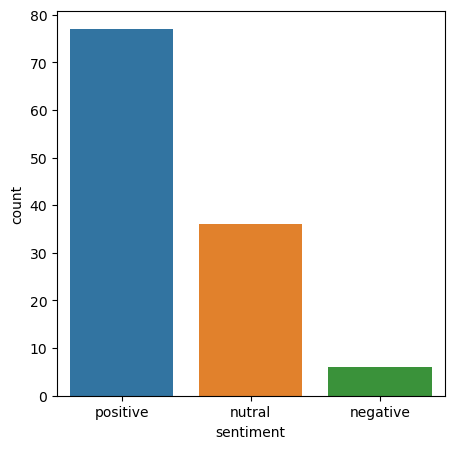

In [305]:
import seaborn as sns
import matplotlib.pyplot as plt

fig=plt.figure(figsize=(5,5))
sns.countplot(x="sentiment",data=review_data2)



Text(0.5, 1.0, 'Distribution Of Sentiments')

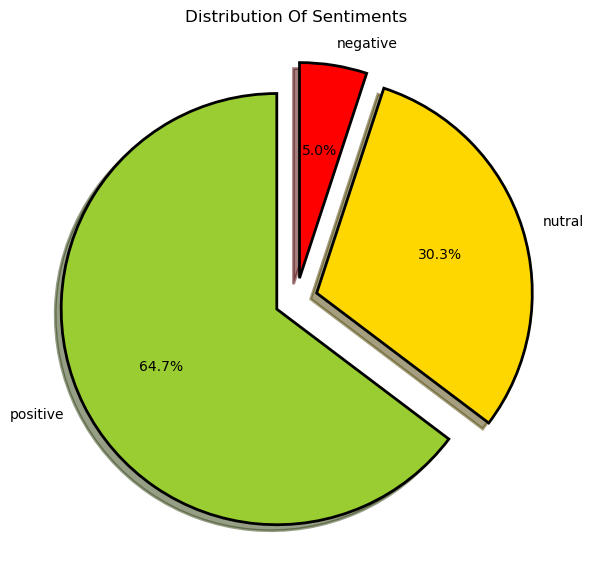

In [306]:
fig=plt.figure(figsize=(7,7))
colors=("yellowgreen","gold","red")
wp={"linewidth":2,"edgecolor":"black"}
tags=review_data2["sentiment"].value_counts()
explode=(0.1,0.1,0.1)
tags.plot(kind='pie',autopct='%1.1f%%',shadow=True,colors=colors,startangle=90,wedgeprops=wp,explode=explode,label='')
plt.title("Distribution Of Sentiments")

In [307]:
review_data2

Review_transform2  \
0    avid runner lookout good pair run shoe offer comfort support recent pair run shoe mix feel abouton posit comfort size shoe great wider feet shoe flexibl breathabl make comfort wear extend period good support feet help avoid injuri runshowev downsid shoe lack cushion heel area found run heel start feel sore achi notic longer run start feel discomfort heel mileswhil lack cushion heel area disappoint shoe offer lot price theyr wellmad comfort good support wider feet your doesnt experi heel pain run shoe great choic youhowev your cushion heel area avoid pain recommend pair shoe invest addit pad heel shoe solid choic runner lack cushion heel area mind   
1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              great day shoe comfort happi purchas   
2                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       ligero suav   
3                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          excelent   
4                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              larg   
..                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              ...   
1

In [308]:
from wordcloud import WordCloud
wc=WordCloud(width=1600,height=500,min_font_size=10,background_color="black")

positive_tweets=wc.generate(review_data2[review_data2['sentiment']=="positive"]["Review_transform2"].str.cat(sep=" "))
positive_tweets

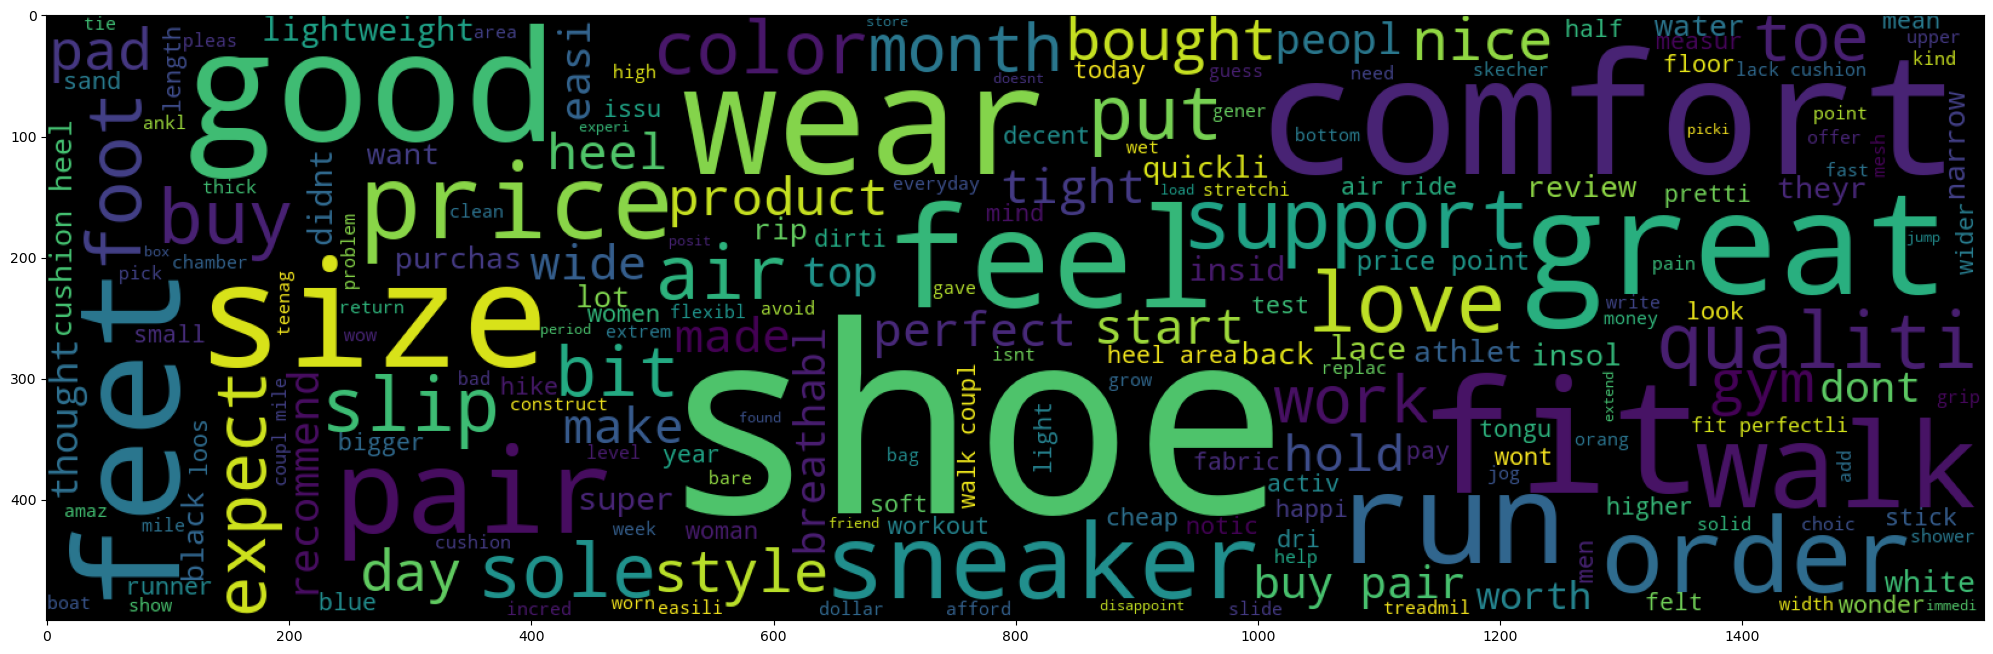

In [309]:
plt.figure(figsize=(25,45))
plt.imshow(positive_tweets)

In [310]:
from wordcloud import WordCloud
wc=WordCloud(width=1600,height=500,min_font_size=10,background_color="white")

negative_tweets=wc.generate(review_data2[review_data2['sentiment']=="negative"]["Review_transform2"].str.cat(sep=" "))
negative_tweets

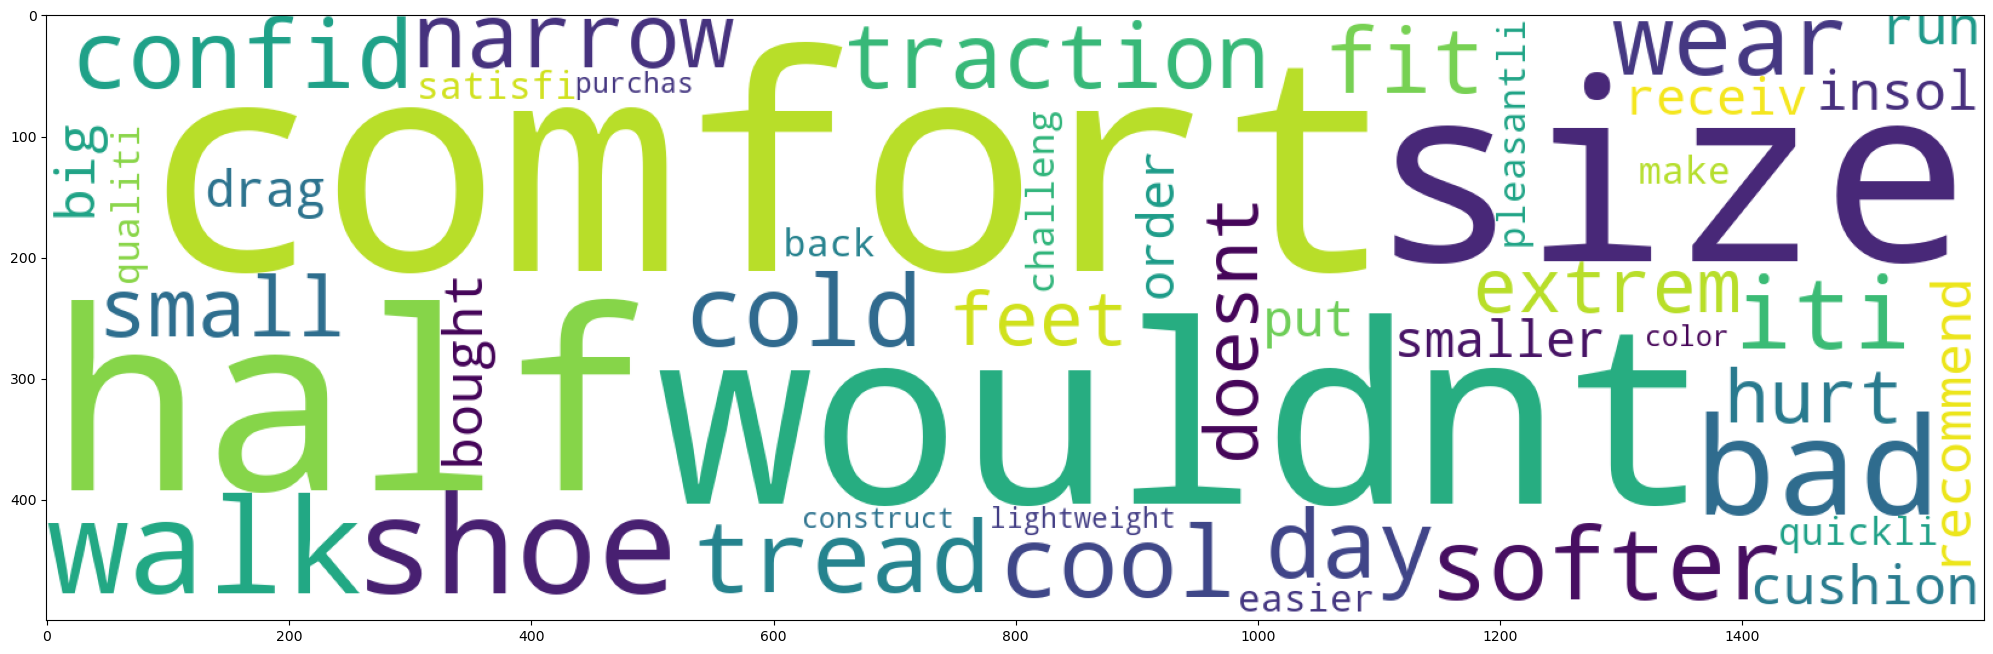

In [311]:
plt.figure(figsize=(25,45))
plt.imshow(negative_tweets)

In [312]:
from wordcloud import WordCloud
wc=WordCloud(width=1600,height=500,min_font_size=10,background_color="white")

nutral_tweets=wc.generate(review_data2[review_data2['sentiment']=="nutral"]["Review_transform2"].str.cat(sep=" "))
nutral_tweets

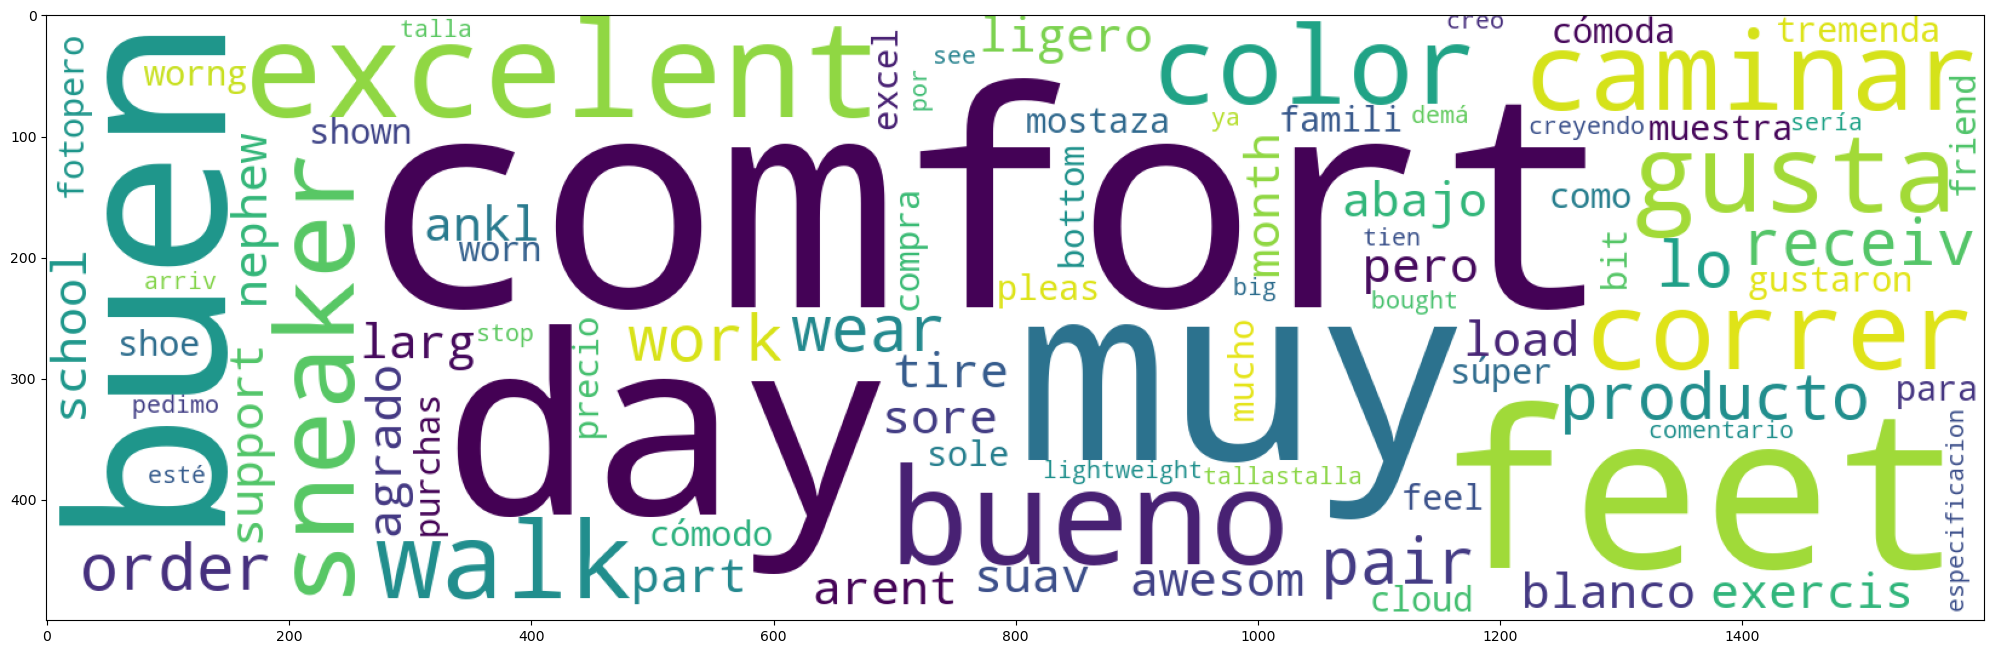

In [313]:
plt.figure(figsize=(25,45))
plt.imshow(nutral_tweets)

In [314]:
## This iS For Positive Tweets...

Po_tweets=[]
for msg in review_data2[review_data2["sentiment"]=="positive"]["Review_transform2"].tolist():
    for word in msg.split():
        Po_tweets.append(word)


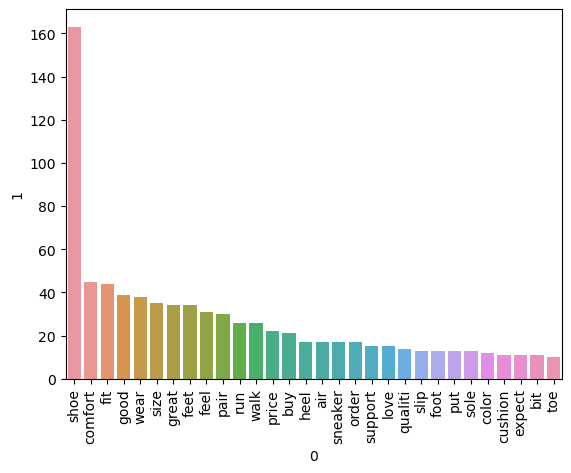

In [315]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(Po_tweets).most_common(30))[0],pd.DataFrame(Counter(Po_tweets).most_common(30))[1])
plt.xticks(rotation="vertical")
plt.show()


In [316]:
## This iS For negative Tweets...
Ne_tweets=[]
for msg in review_data2[review_data2["sentiment"]=="negative"]["Review_transform2"].tolist():
    for word in msg.split():
        Ne_tweets.append(word)

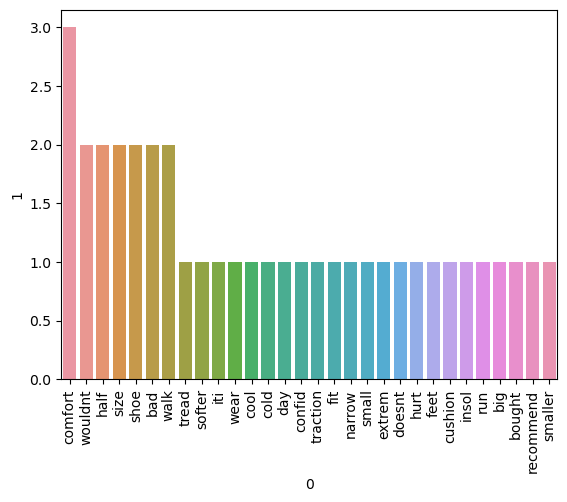

In [317]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(Ne_tweets).most_common(30))[0],pd.DataFrame(Counter(Ne_tweets).most_common(30))[1])
plt.xticks(rotation="vertical")
plt.show()

In [318]:
## This iS For Nutral Tweets Tweets...

Nu_tweets=[]
for msg in review_data2[review_data2["sentiment"]=="nutral"]["Review_transform2"].tolist():
    for word in msg.split():
        Nu_tweets.append(word)


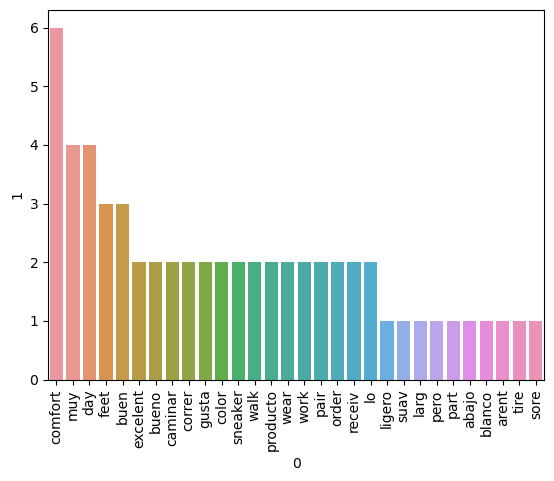

In [319]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(Nu_tweets).most_common(30))[0],pd.DataFrame(Counter(Nu_tweets).most_common(30))[1])
plt.xticks(rotation="vertical")
plt.show()

# Model building 

In [320]:
review_data2

Review_transform2  \
0    avid runner lookout good pair run shoe offer comfort support recent pair run shoe mix feel abouton posit comfort size shoe great wider feet shoe flexibl breathabl make comfort wear extend period good support feet help avoid injuri runshowev downsid shoe lack cushion heel area found run heel start feel sore achi notic longer run start feel discomfort heel mileswhil lack cushion heel area disappoint shoe offer lot price theyr wellmad comfort good support wider feet your doesnt experi heel pain run shoe great choic youhowev your cushion heel area avoid pain recommend pair shoe invest addit pad heel shoe solid choic runner lack cushion heel area mind   
1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              great day shoe comfort happi purchas   
2                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       ligero suav   
3                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          excelent   
4                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              larg   
..                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              ...   
1

In [322]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
review_data2["sentiment"]=LE.fit_transform(review_data2["sentiment"])

In [323]:
review_data2

Review_transform2  \
0    avid runner lookout good pair run shoe offer comfort support recent pair run shoe mix feel abouton posit comfort size shoe great wider feet shoe flexibl breathabl make comfort wear extend period good support feet help avoid injuri runshowev downsid shoe lack cushion heel area found run heel start feel sore achi notic longer run start feel discomfort heel mileswhil lack cushion heel area disappoint shoe offer lot price theyr wellmad comfort good support wider feet your doesnt experi heel pain run shoe great choic youhowev your cushion heel area avoid pain recommend pair shoe invest addit pad heel shoe solid choic runner lack cushion heel area mind   
1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              great day shoe comfort happi purchas   
2                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       ligero suav   
3                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          excelent   
4                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              larg   
..                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              ...   
1

<AxesSubplot:>

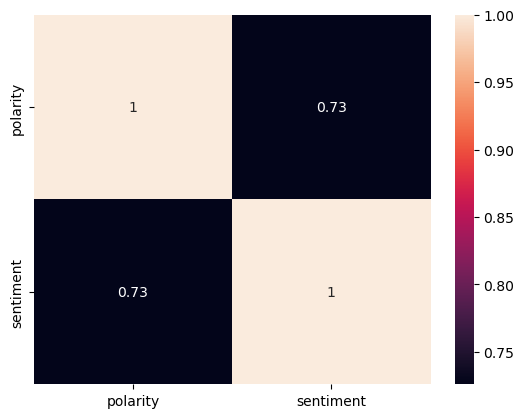

In [325]:
sns.heatmap(review_data2.corr(),annot=True)

In [326]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tfidf=TfidfVectorizer()

In [327]:
tfidf=TfidfVectorizer()
X=tfidf.fit_transform(review_data2["Review_transform2"]).toarray() # To Convert Sparce Array To tends Array

In [328]:
X

array([[0.        , 0.07993257, 0.        , ..., 0.        , 0.1253897 ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [330]:
X.shape

(119, 863)

In [331]:
Y=review_data2["sentiment"]

In [333]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [334]:
print("Size of X_train",(X_train.shape))
print("Size of X_test",(X_test.shape))
print("Size of Y_train",(Y_train.shape))
print("Size of Y_test",(Y_test.shape))

Size of X_train (95, 863)
Size of X_test (24, 863)
Size of Y_train (95,)
Size of Y_test (24,)


In [335]:


from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score
LR=LogisticRegression()
LR.fit(X_train,Y_train)



LogisticRegression()

In [336]:


Y_pred=LR.predict(X_test)
LR_Accuracy_test=accuracy_score(Y_pred,Y_test)
print("Accuracy Score of Test",LR_Accuracy_test.round(2))



Accuracy Score of Test 0.79


In [337]:


from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier



In [338]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression()
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=100, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [351]:


clf = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}



In [347]:


def result(clf,X_train,Y_train,X_test,Y_test):
    clf.fit(X_train,Y_train)
    y_pred=clf.predict(X_test)
    accuracy=accuracy_score(Y_test,y_pred)
    return accuracy



In [348]:
result(etc,X_train,Y_train,X_test,Y_test)

0.9166666666666666

In [349]:
accuracy_scores = []

for name,clf in clf.items():
    current_accuracy= result(clf, X_train,Y_train,X_test,Y_test)
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    accuracy_scores.append(current_accuracy)

For  SVC
Accuracy -  0.7916666666666666
For  KN
Accuracy -  0.25
For  NB
Accuracy -  0.75
For  DT
Accuracy -  0.875
For  LR
Accuracy -  0.7916666666666666
For  RF
Accuracy -  0.8333333333333334
For  AdaBoost
Accuracy -  0.8333333333333334
For  BgC
Accuracy -  0.875
For  ETC
Accuracy -  0.9166666666666666
For  GBDT
Accuracy -  0.875
For  xgb
Accuracy -  0.875


In [352]:


performance_df=pd.DataFrame({"Algorithem" :clf.keys(),"Accuracy_Score":accuracy_scores})

performance_df



Algorithem  Accuracy_Score
0         SVC        0.791667
1          KN        0.250000
2          NB        0.750000
3          DT        0.875000
4          LR        0.791667
5          RF        0.833333
6    AdaBoost        0.833333
7         BgC        0.875000
8         ETC        0.916667
9        GBDT        0.875000
10        xgb        0.875000

In [353]:


performance_df1 = pd.melt(performance_df, id_vars = "Algorithem")
performance_df1


Algorithem        variable     value
0         SVC  Accuracy_Score  0.791667
1          KN  Accuracy_Score  0.250000
2          NB  Accuracy_Score  0.750000
3          DT  Accuracy_Score  0.875000
4          LR  Accuracy_Score  0.791667
5          RF  Accuracy_Score  0.833333
6    AdaBoost  Accuracy_Score  0.833333
7         BgC  Accuracy_Score  0.875000
8         ETC  Accuracy_Score  0.916667
9        GBDT  Accuracy_Score  0.875000
10        xgb  Accuracy_Score  0.875000

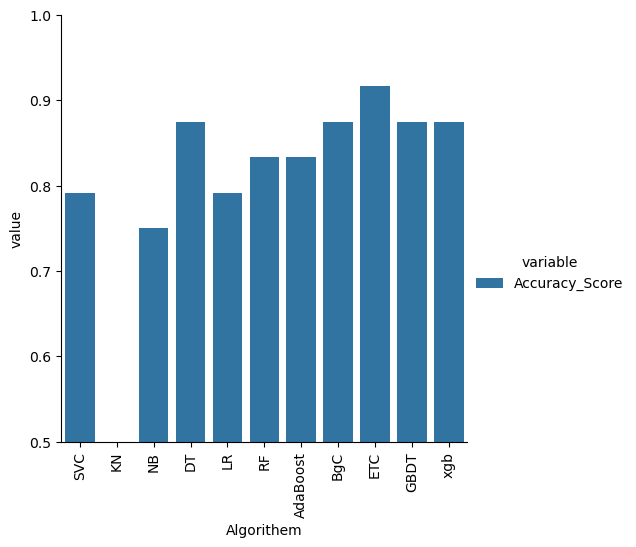

In [354]:


    sns.catplot(x = 'Algorithem', y='value', 
                   hue = 'variable',data=performance_df1, kind='bar',height=5)
    plt.ylim(0.5,1.0)
    plt.xticks(rotation='vertical')
    plt.show()

